Introduction to Data Science <br> Winter 2018

# Homework 5
Due Saturday, 2/3 , 3:00am

Please complete this notebook by filling in the cells provided. Once you are finished, "Save and Checkpoint" the notebook, download the ipynb and html versions to your computer, and submit the html version. 

**Each question is worth 5 points** <br>
**Total points: 50**

In this project, you'll explore data from [Gapminder.org](http://gapminder.org), a website dedicated to providing a fact-based view of the world and how it has changed. That site includes several data visualizations and presentations, but also publishes the raw data that we will use in this project to recreate and extend some of their most famous visualizations.

The Gapminder website collects data from many sources and compiles them into tables that describe many countries around the world. All of the data they aggregate are published in the [Systema Globalis](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/README.md). Their goal is "to compile all public statistics; Social, Economic and Environmental; into a comparable total dataset." All data sets in this homework are copied directly from the Systema Globalis without any changes.

This project is dedicated to [Hans Rosling](https://en.wikipedia.org/wiki/Hans_Rosling) (1948-2017), who championed the use of data to understand and prioritize global development challenges.


**Advice.** Develop your answers incrementally. To perform a complicated table manipulation, break it up into steps, perform each step on a different line, give a new name to each result, and check that each intermediate result is what you expect. You can add any additional names or functions you want to the provided cells. 



A summary of the methods to Table is [here](http://data8.org/datascience/tables.html) <br>
A tutorial for the datascience module is [here](http://data8.org/datascience/tutorial.html) <br>
A cheatsheet for the datascience module is [here](https://github.com/wstuetzle/STAT180/blob/master/Computing/data8_sp17_midterm_ref_sheet.pdf)

In [152]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# from client.api.notebook import Notebook
# ok = Notebook('project1.ok')
# _ = ok.auth(inline=True)

## 1. Global Population Growth


The global population of humans reached 1 billion around 1800, 3 billion around 1960, and 7 billion around 2011. The potential impact of exponential population growth has concerned scientists, economists, and politicians alike.

The UN Population Division estimates that the world population will likely continue to grow throughout the 21st century, but at a slower rate, perhaps reaching 11 billion by 2100. However, the UN does not rule out scenarios of more extreme growth.

<a href="http://www.pewresearch.org/fact-tank/2015/06/08/scientists-more-worried-than-public-about-worlds-growing-population/ft_15-06-04_popcount/"> 
 <img src="pew_population_projection.png"/> 
</a>

In this section, we will examine some of the factors that influence population growth and how they are changing around the world.

The first table we will consider is the total population of each country over time. Run the cell below.

In [153]:
# The population.csv file can also be found online here:
# https://github.com/open-numbers/ddf--gapminder--systema_globalis/raw/master/ddf--datapoints--population_total--by--geo--time.csv
# The version in this project was downloaded in February, 2017.
population = Table.read_table('population.csv')
population.show(3)

geo,time,population_total
abw,1800,19286
abw,1801,19286
abw,1802,19286


### Bangladesh

In the `population` table, the `geo` column contains three-letter codes established by the [International Organization for Standardization](https://en.wikipedia.org/wiki/International_Organization_for_Standardization) (ISO) in the [Alpha-3](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3#Current_codes) standard. We will begin by taking a close look at Bangladesh. Inspect the standard to find the 3-letter code for Bangladesh.

**Question 1.** Create a table called `b_pop` that has two columns labeled `time` and `population_total`. The first column should contain the years from 1970 through 2015 (including both 1970 and 2015) and the second should contain the population of Bangladesh in each of those years.

In [154]:
b_pop = population.where("geo", are.equal_to("bgd")).select("time", "population_total").where("time", are.between_or_equal_to(1970, 2015))
print(b_pop.num_rows)
b_pop.show(3)

46


time,population_total
1970,65048701
1971,66417450
1972,67578486


Run the following cell to create a table called `b_five` that has the population of Bangladesh every five years. At a glance, it appears that the population of Bangladesh has been growing quickly indeed!

In [155]:
b_pop.set_format('population_total', NumberFormatter)

fives = np.arange(1970, 2016, 5) # 1970, 1975, 1980, ...
b_five = b_pop.sort('time').where('time', are.contained_in(fives))
b_five

time,population_total
1970,"65,048,701"
1975,"71,247,153"
1980,"81,364,176"
1985,"93,015,182"
1990,"105,983,136"
1995,"118,427,768"
2000,"131,280,739"
2005,"142,929,979"
2010,"151,616,777"
2015,"160,995,642"


**Question 2.** Create a table called `b_five_growth` that includes three columns, `time`, `population_total`, and `annual_growth`. There should be one row for every five years from 1970 through 2010 (but not 2015). The first two columns are the same as `b_five`. The third column is the **annual** growth rate for each five-year period. For example, the annual growth rate for 1975 is the yearly exponential growth rate that describes the total growth from 1975 to 1980 when applied 5 times.

*Hint*: Only your `b_five_growth` table will be scored for correctness; the other names are suggestions that you are welcome to use, change, or delete.

In [157]:
difference = np.diff(b_five.column("population_total")) / b_five.column("population_total").take(np.arange(0, b_five.num_rows - 1))

In [158]:
b_five_growth = b_five.take(np.arange(0, b_five.num_rows - 1)).with_column("annual_growth", difference)
b_five_growth.set_format('annual_growth', PercentFormatter)
b_five_growth

time,population_total,annual_growth
1970,"65,048,701",9.53%
1975,"71,247,153",14.20%
1980,"81,364,176",14.32%
1985,"93,015,182",13.94%
1990,"105,983,136",11.74%
1995,"118,427,768",10.85%
2000,"131,280,739",8.87%
2005,"142,929,979",6.08%
2010,"151,616,777",6.19%


While the population has grown every five years since 1970, the annual growth rate decreased dramatically from 1985 to 2005. Let's look at some other information in order to develop a possible explanation. Run the next cell to load three additional tables of measurements about countries over time.

In [159]:
life_expectancy = Table.read_table('life_expectancy.csv')
child_mortality = Table.read_table('child_mortality.csv').relabeled(2, 'child_mortality_under_5_per_1000_born')
fertility = Table.read_table('fertility.csv')

The `life_expectancy` table contains a statistic that is often used to measure how long people live, called *life expectancy at birth*. This number, for a country in a given year, [does not measure how long babies born in that year are expected to live](http://blogs.worldbank.org/opendata/what-does-life-expectancy-birth-really-mean). Instead, it measures how long someone would live, on average, if the *mortality conditions* in that year persisted throughout their lifetime. These "mortality conditions" describe what fraction of people at each age survived the year. So, it is a way of measuring the proportion of people that are staying alive, aggregated over different age groups in the population.

In [160]:
life_expectancy.show(3)

geo,time,life_expectancy_years
afg,1800,28.21
afg,1801,28.2
afg,1802,28.19


In [161]:
fertility.show(3)

geo,time,children_per_woman_total_fertility
afg,1800,7
afg,1801,7
afg,1802,7


In [162]:
child_mortality.show(3)

geo,time,child_mortality_under_5_per_1000_born
afg,1800,468.6
afg,1801,468.6
afg,1802,468.6


**Question 3.** Perhaps population is growing more slowly because people aren't living as long. Use the `life_expectancy` table to draw a line graph with the years 1970 and later on the horizontal axis that shows how the *life expectancy at birth* has changed in Bangladesh.

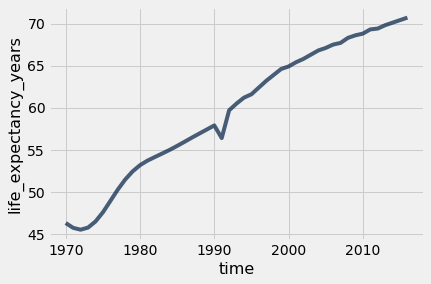

In [143]:
x = life_expectancy.where("geo", are.equal_to("bgd")).where("time", are.above_or_equal_to(1970)).select("time", "life_expectancy_years")
x.plot("time", "life_expectancy_years")

**Question 4.** Does the graph above help directly explain why the population growth rate decreased from 1985 to 2010 in Bangladesh? Why or why not? What happened in Bangladesh in 1991, and does that event explain the change in population growth rate?

1. No, I would not say the graph explains decrease of population growth rate directly. But it explains it indirectly. By increasing the life expectancy, there is some change to the birth rate, while there are no more children are born by having elderly people live longer, the healthcare improvements that cause this increased life expecntancy will also increase infant mortality and so it would increase birth rate. 

2. On the April in Banglades, one of the most deadliest tropical cyclone striked Bangladesh, engendering at least 138000 dead bodies in Bangladesh. The Bangladesh cyclone explains why the life expectancy from 1990 to 1991 has dramatically decreased. Due to cyclone, enourmous number of dead was engendered which caused life expectancy to fall dramatically.


The `fertility` table contains a statistic that is often used to measure how many babies are being born, the *total fertility rate*. This number describes the [number of children a woman would have in her lifetime](https://www.measureevaluation.org/prh/rh_indicators/specific/fertility/total-fertility-rate), on average, if the current rates of birth by age of the mother persisted throughout her child bearing years, assuming she survived through age 49. 

**Question 5.** Write a function `fertility_over_time` that takes the Alpha-3 code of a `country` and a `start` year. It returns a two-column table with labels "`Year`" and "`Children per woman`" that can be used to generate a line chart of the country's fertility rate each year, starting at the `start` year. The plot should include the `start` year and all later years that appear in the `fertility` table. 

Then, in the next cell, call your `fertility_over_time` function on the Alpha-3 code for Bangladesh and the year 1970 in order to plot how Bangladesh's fertility rate has changed since 1970.

In [165]:
def fertility_over_time(country, start):
    t = fertility.where("geo",are.equal_to(country)).where("time", are.above_or_equal_to(start))
    t = t.select("time","children_per_woman_total_fertility")\
    .relabel(["time","children_per_woman_total_fertility"],["Year", "Children per woman"])
    return t

fertility_over_time("bgd", 1970).show(3)

Year,Children per woman
1970,6.95
1971,6.94
1972,6.93


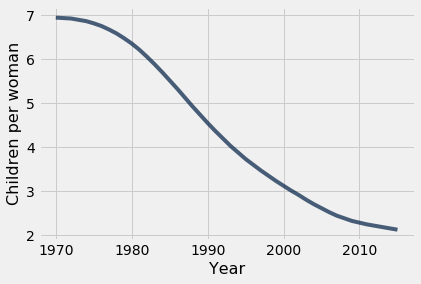

In [166]:
fertility_over_time("bgd", 1970).plot("Year", "Children per woman")

**Question 6.** Does the graph above help directly explain why the population growth rate decreased from 1985 to 2010 in Bangladesh? Why or why not?

Yes, because the slope of the graph is negative. which means the number of child that woman has decreased, and decrease of the number of children that woman has directly explains the decrease in number of newborns in the country. The decrease in the number of new born directly explains decrease of rate of grown.

It has been observed that lower fertility rates are often associated with lower child mortality rates. The link has been attributed to family planning: if parents can expect that their children will all survive into adulthood, then they will choose to have fewer children. We can see if this association is evident in Bangladesh by plotting the relationship between total fertility rate and [child mortality rate per 1000 children](https://en.wikipedia.org/wiki/Child_mortality).

**Question 7.** Using both the `fertility` and `child_mortality` tables, draw a scatter diagram with one point for each year, starting with 1970, that has Bangladesh's total fertility on the horizontal axis and its child mortality on the vertical axis. Use the label "`Children per woman`" to describe total fertility and the label "`Child deaths per 1000 born`" to describe child mortality.

** Hint:** Create a table with the appropriate column labels and then use the ".scatter" method to draw the plot/

In [174]:
def mortality_over_time(country, start):
    t = child_mortality.where("geo",are.equal_to(country)).where("time", are.above_or_equal_to(start))\
    .select("child_mortality_under_5_per_1000_born")

    return t

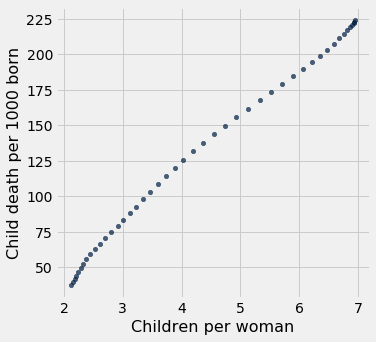

In [175]:
new_table = Table().with_columns(
    "Children per woman", fertility_over_time("bgd", 1970).column("Children per woman"),
    "Child death per 1000 born", mortality_over_time("bgd",1970).column("child_mortality_under_5_per_1000_born")
                               )
new_table.scatter(column_for_x= "Children per woman")

**Question 8.** In one or two sentences, describe the association (if any) that is illustrated by this scatter diagram. Does the diagram show that reduced child mortality causes parents to choose to have fewer children?

The children per woman tend to increase with increase in child death. Yes, the diagram shows that reduced child mortality causes parents to choose to have fewer children because children per woman decreased significantly with lower child death because children are more likely to survive.

### The World

The change observed in Bangladesh since 1970 can also be observed in many other developing countries: health services improve, life expectancy increases, and child mortality decreases. At the same time, the fertility rate often plummets, and so the population growth rate decreases despite increasing longevity.

Run the cell below to generate two overlaid histograms, one for 1960 and one for 2010, that show the distributions of total fertility rates for these two years among all 201 countries in the `fertility` table.

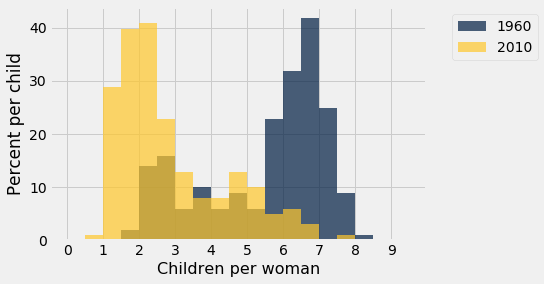

In [148]:
Table().with_columns(
    '1960', fertility.where('time', 1960).column(2),
    '2010', fertility.where('time', 2010).column(2)
).hist(bins=np.arange(0, 10, 0.5), unit='child')
_ = plots.xlabel('Children per woman')
_ = plots.xticks(np.arange(10))

**Question 9.** Assign `fertility_statements` to a list of the numbers for each statement below that can be correctly inferred from these histograms.
1. About the same number of countries had a fertility rate between 3.5 and 4.5 in both 1960 and 2010.
1. In 2010, about 40% of countries had a fertility rate between 1.5 and 2.
1. In 1960, less than 20% of countries had a fertility rate below 3.
1. More countries had a fertility rate above 3 in 1960 than in 2010.
1. At least half of countries had a fertility rate between 5 and 8 in 1960.
1. At least half of countries had a fertility rate below 3 in 2010.

In [149]:
fertility_statements = make_array(1, 3, 4, 5, 6 )

**Question 10.** Draw a line plot of the world population for the years 1800, 1810, 1820,...,2000. The world population is the sum of all the country's populations. 

c:\users\jbsoo\appdata\local\programs\python\python36\lib\site-packages\datascience\tables.py:192: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


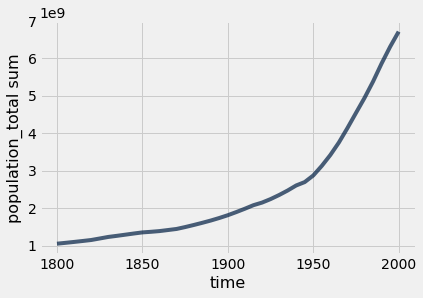

In [214]:
t = population.select("time", "population_total").astype("int64")\
.group("time", np.sum).where("time", are.contained_in(np.arange(1800,2001,5)))
t.plot("time")
